In [55]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from constants import *

In [56]:
# figuresize global
plt.rc('figure', figsize=(10,10))

In [57]:
# flag for outliner visability
show_outliner = True

In [58]:
df_results = pd.read_feather(RESULTS_FILE_PATH)
df_results.head()

dataset_id   dataset_name  task_id  n_classes  n_features  n_samples  \
0           3       kr-vs-kp        3          2          36       3196   
1           6         letter        6         26          16      20000   
2          11  balance-scale       11          3           4        625   
3          12  mfeat-factors       12         10         216       2000   
4          14  mfeat-fourier       14         10          76       2000   

   n_features_ohe  n_features_filtered  pca_clean_n_features_created  \
0              73                   60                             1   
1              16                   13                             1   
2               4                    4                             2   
3             216                   73                             3   
4              76                   20                             1   

   pca_clean_creation_time_seconds  kpca_clean_n_features_created  \
0                         3.658458                              1   
1                        13.803269                              1   
2                         0.426095                              1   
3                         6.308460                              2   
4                         3.546795                              1   

   kpca_clean_creation_time_seconds  umap_clean_n_features_created  \
0                          6.783027                              1   
1                         82.972428                              2   
2                          0.563126                              2   
3                          6.494139                              2   
4                          4.710817                              1   

   umap_clean_creation_time_seconds  kmeans_clean_n_features_created  \
0                         37.268224                                1   
1                        143.765481                                1   
2                         12.597098                                1   
3                         26.177087                                1   
4                         24.058391                                1   

   kmeans_clean_creation_time_seconds  lda_clean_n_features_created  \
0                           12.216738                             1   
1                           64.153267                             1   
2                            4.977115                             1   
3                            8.672944                             9   
4                            8.124455                             9   

   lda_clean_creation_time_seconds  autoencoder_clean_n_features_created  \
0                         0.346189                                     8   
1                        19.374164                                     4   
2                         0.291065                                     2   
3                         4.281974                                    10   
4                         2.685348                                     8   

   autoencoder_clean_creation_time_seconds  pca_filtered_n_features_created  \
0                                 6.546732                                2   
1                                26.587504                                1   
2                                 2.982464                                2   
3                                 3.953141                                2   
4                                 4.040147                                3   

   pca_filtered_creation_time_seconds  kpca_filtered_n_features_created  \
0                            2.476264                                 3   
1                           13.489147                                 1   
2                            0.420094                                 1   
3                            3.032679                                 2   
4                            2.892648                                 1   

   kpca_filtered_creation_time_seconds  

# Best mode without Stacking


In [59]:
df = df_results.loc[:, df_results.columns.str.contains("test_score|dataset_id|dataset_name", regex=True)]
df = df.loc[:, ~df.columns.str.contains("stacking|>|time|change", regex=True)]
df.head()

,dataset_id,dataset_name,baseline_filtered_test_score,only_pca_test_score,only_kpca_test_score,only_kmeans_test_score,only_lda_test_score,only_umap_test_score,only_autoencoder_test_score,only_pca_filtered_test_score,only_kpca_filtered_test_score,only_kmeans_filtered_test_score,only_lda_filtered_test_score,only_umap_filtered_test_score,only_autoencoder_filtered_test_score,baseline_filtered_pca_test_score,baseline_filtered_kpca_test_score,baseline_filtered_kmeans_test_score,baseline_filtered_lda_test_score,baseline_filtered_umap_test_score,baseline_filtered_autoencoder_test_score,baseline_filtered_pca_filtered_test_score,baseline_filtered_kpca_filtered_test_score,baseline_filtered_kmeans_filtered_test_score,baseline_filtered_lda_filtered_test_score,baseline_filtered_umap_filtered_test_score,baseline_filtered_autoencoder_filtered_test_score,selected_features_test_score,selected_features_filtered_test_score,all_features_test_score,all_features_filtered_test_score
0,3,kr-vs-kp,0.975161,0.565777,0.540018,0.537259,0.952162,0.664213,0.916283,0.650414,0.729531,0.730451,0.943882,0.688132,0.928243,0.978841,0.981601,0.977001,0.988960,0.984361,0.982521,0.975161,0.977921,0.976081,0.978841,0.976081,0.977001,0.989880,0.978841,0.992640,0.977921
1,6,letter,0.957794,0.131765,0.121471,0.053971,0.196471,0.706912,0.619118,0.206176,0.220147,0.434559,0.251324,0.571029,0.666912,0.953971,0.960000,0.960147,0.956176,0.955735,0.947647,0.955441,0.955000,0.956471,0.958382,0.956176,0.949412,0.954853,0.949118,0.948971,0.948676
2,11,balance-scale,0.873239,0.558685,0.568075,0.779343,0.906103,0.708920,0.666667,0.558685,0.568075,0.779343,0.906103,0.708920,0.455399,0.863850,0.863850,0.845070,0.920188,0.840376,0.859155,0.863850,0.863850,0.845070,0.920188,0.840376,0.877934,0.915493,0.924883,0.929577,0.934272
3,12,mfeat-factors,0.957353,0.745588,0.551471,0.670588,0.983824,0.901471,0.917647,0.652941,0.645588,0.708824,0.958824,0.894118,0.922059,0.955882,0.958824,0.954412,0.982353,0.951471,0.952941,0.955882,0.958824,0.952941,0.975000,0.961765,0.954412,0.977941,0.969118,0.979412,0.970588
4,14,mfeat-fourier,0.850000,0.282353,0.279412,0.154412,0.833824,0.629412,0.704412,0.719118,0.454412,0.547059,0.829412,0.766176,0.736765,0.850000,0.848529,0.844118,0.835294,0.850000,0.842647,0.838235,0.855882,0.847059,0.848529,0.839706,0.841176,0.850000,0.841176,0.841176,0.852941


In [60]:
# get all column with test_scores
test_score_columns = list(df.columns)
non_test_score_columns_and_baseline = ["dataset_id", "dataset_name", "baseline_filtered_test_score"]
test_score_columns = [column for column in test_score_columns if column not in non_test_score_columns_and_baseline]

# get the highest scoring model test_score in a column
df["highest_test_score"] = df[test_score_columns].max(axis="columns")

# compare best_score to baseline score
df["highest_test_score>baseline"] = df["highest_test_score"] > df["baseline_filtered_test_score"]

# calc the change from best test_score to baseline test_score
df["change_to_baseline"] = (df["highest_test_score"] / df['baseline_filtered_test_score'] -1) *100

In [61]:
# calc the changes to the baseline for all datasets and for improved datasets
all_dataset_changes = df["change_to_baseline"]
improved_dataset_changes = df[df["change_to_baseline"] > 0]["change_to_baseline"]

# make a dict for both changes
changes_dict = {"all datasets": list(all_dataset_changes), "improved datasets": list(improved_dataset_changes)}

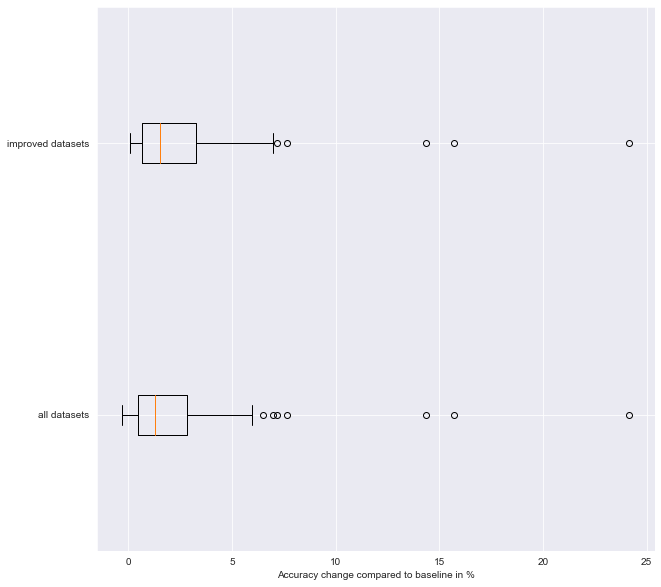

In [62]:
# make a plot with a boxplot for each type of changes
fig, ax = plt.subplots()
ax.boxplot(
    changes_dict.values(),
    vert=False,
    showfliers=show_outliner,
    #patch_artist=False,
    #autorange=False,
    #meanline=True,
    #showmeans=True,
)
ax.set_yticklabels(changes_dict.keys())
ax.set_xlabel("Accuracy change compared to baseline in %")
plt.show()


# Optimale Featurebasis

In [63]:
# get best feature change from features generate on all basefeatures
df_all = df_results.loc[:, df_results.columns.str.contains("baseline_filtered_[a-zA-Z]+_test_score_change_to_baseline_filtered", regex=True)]
df_all["best_change_basefeatures"] = df_all.max(axis="columns")

# get only the improved datasets compared to the baseline
all_basefeatures_improved = df_all[df_all["best_change_basefeatures"] > 0]["best_change_basefeatures"]
all_basefeatures_improved

C:\Users\jonas\AppData\Local\Temp\ipykernel_10284\3517234520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["best_change_basefeatures"] = df_all.max(axis="columns")


0      1.415094
1      0.245663
2      5.376344
3      2.611367
6      1.085271
7      1.431493
8      3.544776
9      1.083032
10     0.106610
11     2.955665
12     5.394191
14     0.995025
15     0.237906
16     0.403226
17     0.671785
19     5.963303
20     1.874497
21     0.753012
22     5.454545
23     6.059322
25     1.060071
26     1.960784
27     1.339868
28     2.008929
30     0.066890
31     3.472222
32     0.657895
33     0.849858
34     0.490337
35     0.430108
36     2.912621
39     1.824603
40     5.035971
42     0.194158
43     0.246305
44     0.484555
45     1.986755
46     0.271297
47     1.026694
48     1.075269
49     1.099676
50     0.198020
52     0.897263
53     2.205882
55     0.964171
56     2.200220
57     4.060801
58     1.251203
59     0.061463
60    16.476742
61    10.249494
62     1.392758
64     0.278035
65     0.614439
66     2.012072
67     0.620347
68     0.273224
69     4.790419
70     1.992602
71     4.361164
Name: best_change_basefeatures, dtype: f

In [64]:
# get best feature change from features generate on selekted basefeatures
df_sel = df_results.loc[:, df_results.columns.str.contains("baseline_filtered_[a-zA-Z]+_filtered_test_score_change_to_baseline_filtered", regex=True)]
df_sel["best_change_basefeatures"] = df_sel.max(axis="columns")

# get only the improved datasets compared to the baseline
sel_basefeatures_improved = df_sel[df_sel["best_change_basefeatures"] > 0]["best_change_basefeatures"]
sel_basefeatures_improved

C:\Users\jonas\AppData\Local\Temp\ipykernel_10284\288012557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["best_change_basefeatures"] = df_sel.max(axis="columns")


0     0.377358
1     0.061416
2     5.376344
3     1.843318
4     0.692042
6     0.465116
7     1.431493
8     3.171642
9     1.444043
10    0.106610
11    2.463054
12    3.319502
14    1.990050
15    0.475813
16    0.268817
17    0.383877
18    0.308642
19    0.458716
20    0.666325
21    0.301205
22    5.454545
23    1.694915
25    1.060071
26    1.960784
27    0.062947
28    1.562500
31    2.083333
32    0.822368
33    0.566572
34    0.144217
35    0.430108
36    2.912621
37    1.474926
38    0.234009
39    0.088287
40    4.316547
42    0.167682
43    0.369458
44    0.484555
45    1.655629
46    0.271297
48    1.075269
49    0.126886
51    0.137325
52    1.121579
53    3.676471
54    3.773585
56    2.420242
57    0.094308
58    1.347449
59    0.245851
60    0.317579
61    1.092380
62    1.114206
63    0.355872
64    0.834106
66    1.609658
67    0.620347
68    0.546448
69    2.395210
71    4.361164
Name: best_change_basefeatures, dtype: float64

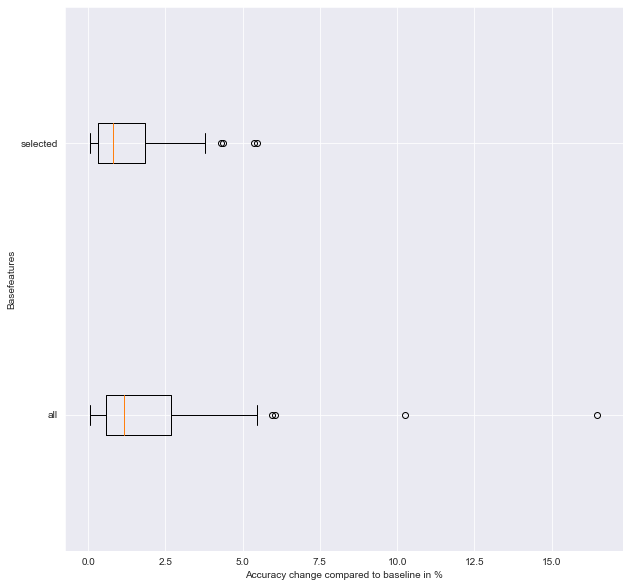

In [65]:
# make a plot with both featurebasis boxplots
changes_dict = {"all": all_basefeatures_improved, "selected": sel_basefeatures_improved}

fig, ax = plt.subplots()
ax.boxplot(
    changes_dict.values(),
    vert=False,
    showfliers=show_outliner,
    #patch_artist=False,
    #autorange=False,
    #meanline=True,
    #showmeans=True,
)
ax.set_yticklabels(changes_dict.keys())
ax.set_xlabel("Accuracy change compared to baseline in %")
ax.set_ylabel("Basefeatures")
plt.show()

# Optimale Auswahl von Featurekombinationen

In [66]:
# selected features
df_sel = df_results.loc[:, df_results.columns.str.contains("selected_features", regex=True)]
df_sel = df_sel.loc[:, ~df_sel.columns.str.contains("selected_features_filtered|train|time|>|hyper", regex=True)]
df_sel = df_sel["selected_features_test_score_change_to_baseline_filtered"]
df_sel.head()


0    1.509434
1   -0.307078
2    4.838710
3    2.150538
4    0.000000
Name: selected_features_test_score_change_to_baseline_filtered, dtype: float64

In [67]:
# all features
df_all = df_results.loc[:, df_results.columns.str.contains("all_features", regex=True)]
df_all = df_all.loc[:, ~df_all.columns.str.contains("train|time|>|hyper", regex=True)]
df_all = df_all["all_features_test_score_change_to_baseline_filtered"]
df_all.head()

0    1.792453
1   -0.921234
2    6.451613
3    2.304147
4   -1.038062
Name: all_features_test_score_change_to_baseline_filtered, dtype: float64

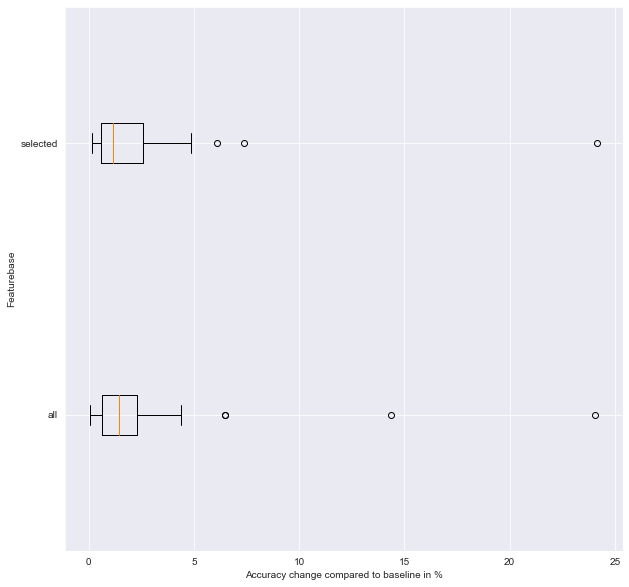

In [68]:
# make a plot with both featurebasis boxplots
changes_dict = {"all": df_all[df_all > 0], "selected": df_sel[df_sel > 0]}

fig, ax = plt.subplots()
ax.boxplot(
    changes_dict.values(),
    vert=False,
    showfliers=show_outliner,
    #patch_artist=False,
    #autorange=False,
    #meanline=True,
    #showmeans=True,
)
ax.set_yticklabels(changes_dict.keys())
ax.set_xlabel("Accuracy change compared to baseline in %")
ax.set_ylabel("Featurebase")
plt.show()

# Stacking

In [69]:
# stacking all features
df_all = df_results.loc[:, df_results.columns.str.contains("stacking_all_features|stacking_baseline_filtered", regex=True)]
df_all = df_all.loc[:, ~df_all.columns.str.contains("only|train|time|hyper|pca|lda|umap|kmeans|autoencoder|selected_features|any", regex=True)]
df_all["change"] = (df_all["stacking_all_features_test_score"] / df_all["stacking_baseline_filtered_test_score"] - 1) *100
df_all = df_all["change"]
df_all.head()

0    1.219512
1   -0.622249
2   -3.000000
3    1.067073
4   -3.214890
Name: change, dtype: float64

In [70]:
# stacking only improved features
df_imp = df_results.loc[:, df_results.columns.str.contains("stacking_improved_features|stacking_baseline_filtered", regex=True)]
df_imp = df_imp.loc[:, ~df_imp.columns.str.contains("only|train|time|hyper|pca|lda|umap|kmeans|autoencoder|selected_features|any", regex=True)]
df_imp["change"] = (df_imp["stacking_improved_features_test_score"] / df_imp["stacking_baseline_filtered_test_score"] - 1) *100
df_imp = df_imp["change"]
df_imp.head()

0    1.031895
1    0.000000
2    0.500000
3    1.219512
4   -2.368866
Name: change, dtype: float64

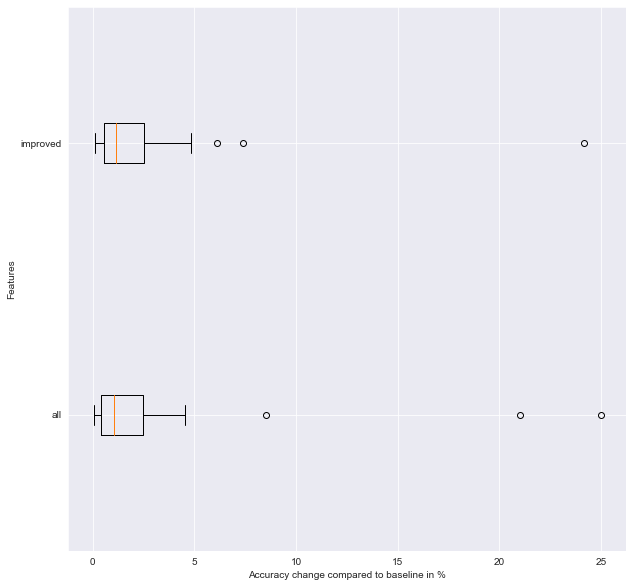

In [71]:
# make a plot with both featurebasis boxplots
changes_dict = {"all": df_all[df_all > 0], "improved": df_sel[df_sel > 0]}

fig, ax = plt.subplots()
ax.boxplot(
    changes_dict.values(),
    vert=False,
    showfliers=show_outliner,
    #patch_artist=False,
    #autorange=False,
    #meanline=True,
    #showmeans=True,
)
ax.set_yticklabels(changes_dict.keys())
ax.set_xlabel("Accuracy change compared to baseline in %")
ax.set_ylabel("Features")
plt.show()